<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objetivo" data-toc-modified-id="Objetivo-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objetivo</a></span><ul class="toc-item"><li><span><a href="#Reursos-necesarios" data-toc-modified-id="Reursos-necesarios-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Reursos necesarios</a></span></li></ul></li><li><span><a href="#Práctica" data-toc-modified-id="Práctica-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Práctica</a></span><ul class="toc-item"><li><span><a href="#Comprensión-del-Problema" data-toc-modified-id="Comprensión-del-Problema-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Comprensión del Problema</a></span></li><li><span><a href="#Exploración-de-Datos" data-toc-modified-id="Exploración-de-Datos-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Exploración de Datos</a></span></li><li><span><a href="#División-de-Datos" data-toc-modified-id="División-de-Datos-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>División de Datos</a></span></li><li><span><a href="#Preprocesamiento-de-Datos" data-toc-modified-id="Preprocesamiento-de-Datos-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Preprocesamiento de Datos</a></span><ul class="toc-item"><li><span><a href="#Bag-of-Words" data-toc-modified-id="Bag-of-Words-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Bag of Words</a></span></li></ul></li><li><span><a href="#Construcción-de-Modelos" data-toc-modified-id="Construcción-de-Modelos-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Construcción de Modelos</a></span><ul class="toc-item"><li><span><a href="#Modelo-de-Clasificación" data-toc-modified-id="Modelo-de-Clasificación-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Modelo de Clasificación</a></span></li><li><span><a href="#Matriz-de-Confusión-y-Métricas-de-Evaluación" data-toc-modified-id="Matriz-de-Confusión-y-Métricas-de-Evaluación-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>Matriz de Confusión y Métricas de Evaluación</a></span></li><li><span><a href="#Evaluación-del-Desempeño" data-toc-modified-id="Evaluación-del-Desempeño-2.5.3"><span class="toc-item-num">2.5.3&nbsp;&nbsp;</span>Evaluación del Desempeño</a></span></li><li><span><a href="#Naive-Bayes" data-toc-modified-id="Naive-Bayes-2.5.4"><span class="toc-item-num">2.5.4&nbsp;&nbsp;</span>Naive Bayes</a></span></li><li><span><a href="#SVM" data-toc-modified-id="SVM-2.5.5"><span class="toc-item-num">2.5.5&nbsp;&nbsp;</span>SVM</a></span></li><li><span><a href="#Árboles-de-decisión" data-toc-modified-id="Árboles-de-decisión-2.5.6"><span class="toc-item-num">2.5.6&nbsp;&nbsp;</span>Árboles de decisión</a></span></li></ul></li><li><span><a href="#Interpretación-de-Resultados" data-toc-modified-id="Interpretación-de-Resultados-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Interpretación de Resultados</a></span></li><li><span><a href="#Evaluación-de-la-práctica" data-toc-modified-id="Evaluación-de-la-práctica-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Evaluación de la práctica</a></span></li></ul></li></ul></div>

## Objetivo

> Aprender a construir y evaluar un modelo de clasificación de correos
electrónicos como spam o no spam.

### Reursos necesarios

- Acceso al [dataset](https://www.kaggle.com/datasets/purusinghvi/email-spam-classification-dataset) de Kaggle.

- Herramientas de análisis. Python con bibliotecas (pandas, numpy, scikit-learn, matplotlib).

## Práctica

### Comprensión del Problema

El problema consiste en la mezcla de algunos datasets que contienen la información de correos electrónicos etiquetados como spam o no spam, el problema consta de hacer la clasificación de cuales correos son spam y cuales no, esto ayuda al sistema a clasificar los correos y decidir que correos mostrarle al usuario, los cuales deben de ser los más relevantes.

### Exploración de Datos

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("combined_data.csv")

In [3]:
data

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...
...,...,...
83443,0,hi given a date how do i get the last date of ...
83444,1,now you can order software on cd or download i...
83445,1,dear valued member canadianpharmacy provides a...
83446,0,subscribe change profile contact us long term ...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [5]:
data.isna().sum()

label    0
text     0
dtype: int64

In [6]:
df = data.sample(n=20_000, random_state=42)

In [7]:
df

,label,text
67681,0,accuweather escapenumber day forecast for beve...
61385,1,dear in christ the time has come for christian...
41829,1,hallway cosponsor pry reimbursable coat clumsy...
29172,1,does size matter' escapenumber of women said t...
35274,0,along zeng wrote hi all is there levene' test ...
...,...,...
71454,0,on escapenumber escapenumber escapenumber maph...
44071,0,hi i used split screen command to creaye escap...
71721,0,begin pgp signed message hash shaescapenumber...
3928,0,we have a great deal of work underway with our...


In [8]:
df.isna().sum()

label    0
text     0
dtype: int64

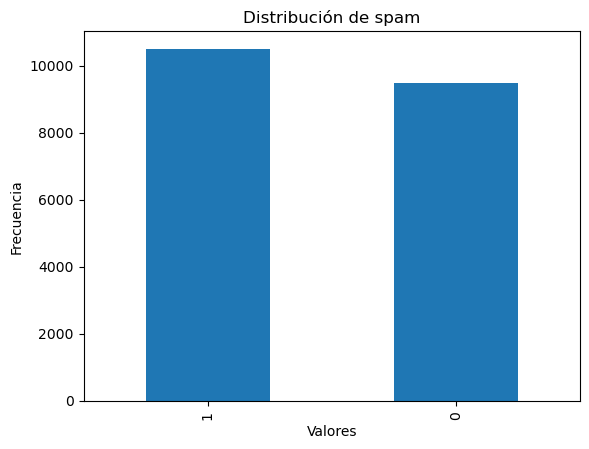

In [9]:
type1_counts = df['label'].value_counts()
type1_counts.plot(kind='bar')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Distribución de spam')
plt.show()

In [10]:
labels = {0 : "Not Spam", 1 : "Spam"}
label_counts = df['label'].value_counts()
print(label_counts)

1    10504
0     9496
Name: label, dtype: int64


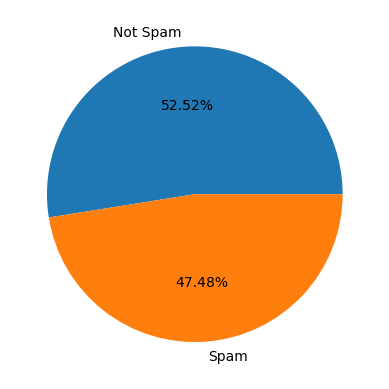

In [11]:
plt.pie(label_counts, labels = labels.values(), autopct = "%.2f%%")
plt.show()

### División de Datos

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.25, random_state=42)

In [14]:
X_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 15000 entries, 15990 to 43579
Series name: text
Non-Null Count  Dtype 
--------------  ----- 
15000 non-null  object
dtypes: object(1)
memory usage: 234.4+ KB


In [15]:
X_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 5000 entries, 24397 to 30749
Series name: text
Non-Null Count  Dtype 
--------------  ----- 
5000 non-null   object
dtypes: object(1)
memory usage: 78.1+ KB


### Preprocesamiento de Datos

#### Bag of Words

Representa un documento como un conjunto no ordenado de palabras, ignorando la estructura gramatical y el orden de las palabras. Cada palabra única en el corpus se convierte en una característica, y el valor en cada posición del vector representa la frecuencia o la presencia de esa palabra en el documento.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X_train.values)
Y = vectorizer.transform(X_test.values)

In [18]:
X.toarray()

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  2,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [27,  0,  0, ...,  0,  0,  0]])

In [19]:
Y.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Construcción de Modelos

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

#### Modelo de Clasificación

>Un modelo de clasificación es un algoritmo o sistema que se entrena para asignar una etiqueta (o clase) a una entrada basándose en ciertas características o atributos. La tarea principal de un modelo de clasificación es aprender patrones a partir de datos de entrenamiento para luego hacer predicciones sobre nuevos datos.

- **Datos de Entrada:**

Un conjunto de datos de entrada que consiste en ejemplos de entrenamiento, donde cada ejemplo tiene características y una etiqueta asociada.

- **Entrenamiento del Modelo:**

El modelo de clasificación se entrena utilizando el conjunto de datos de entrenamiento. Durante el entrenamiento, el modelo ajusta sus parámetros internos para aprender los patrones que relacionan las características de entrada con las etiquetas de salida.

- **Predicciones:**

Después del entrenamiento, el modelo puede realizar predicciones sobre nuevos datos. Dada una entrada sin etiqueta, el modelo asigna una etiqueta basándose en los patrones aprendidos durante el entrenamiento.

- **Evaluación del Rendimiento:**

El rendimiento del modelo se evalúa utilizando un conjunto de datos de prueba o de validación que no se utilizó durante el entrenamiento. Métricas comunes de evaluación incluyen precisión, recall, F1-score, matriz de confusión, entre otras, dependiendo de la naturaleza del problema.

#### Matriz de Confusión y Métricas de Evaluación

- **Matriz de confusión**

Una matriz de confusión es una tabla que se utiliza en clasificación para evaluar el rendimiento de un modelo. Esta matriz compara las predicciones del modelo con los valores reales y resume la cantidad de verdaderos positivos (TP), falsos positivos (FP), verdaderos negativos (TN) y falsos negativos (FN).

    Verdaderos Positivos (TP): 
    Casos en los que el modelo predijo positivo y la clase real también es positiva.

    Falsos Positivos (FP): 
    Casos en los que el modelo predijo positivo, pero la clase real es negativa.

    Verdaderos Negativos (TN): 
    Casos en los que el modelo predijo negativo y la clase real también es negativa.

    Falsos Negativos (FN): 
    Casos en los que el modelo predijo negativo, pero la clase real es positiva.

- **Exactitud**

Proporción de predicciones correctas con respecto al total de predicciones. Es una medida general del rendimiento del modelo.

$$ \frac{TP+TN}{TP+FP+TN+FN} $$

- **Precisión**

Proporción de instancias positivas predichas correctamente entre todas las instancias positivas predichas.

$$ \frac{TP}{TP+FP} $$

- **Tasa de error**

Proporción de predicciones incorrectas con respecto al total de predicciones.

$$ \frac{FP+FN}{TP+FP+TN+FN} $$

- **Sensibilidad (recall)**

Proporción de instancias positivas predichas correctamente entre todas las instancias positivas reales.

$$ \frac{TP}{TP+FN} $$

- **Especificidad**

Proporción de instancias negativas predichas correctamente entre todas las instancias negativas reales.

$$ \frac{TN}{TN+FP} $$

- **Comprensibilidad**

Media armónica de precisión y sensibilidad. Es útil cuando hay un desequilibrio entre las clases.

$$ \frac{2 * Presicion * Sensibilidad}{Presicion + Sensibilidad} $$

#### Evaluación del Desempeño

- **Método de Retención (Holdout):**

Divide el conjunto de datos en conjuntos de entrenamiento y prueba. El modelo se entrena en el conjunto de entrenamiento y se evalúa en el conjunto de prueba.

- **Validación Cruzada (Cross-Validation):**

Divide el conjunto de datos en k pliegues (folds). El modelo se entrena k veces, cada vez utilizando k-1 pliegues como conjunto de entrenamiento y el pliegue restante como conjunto de prueba.

- **Submuestreo Aleatorio (Random Undersampling):**

Reduce el tamaño de la clase mayoritaria al eliminar aleatoriamente ejemplos. Se utiliza en problemas de desequilibrio de clases.

- **Bootstrap:**

Muestreo con reemplazo. Se generan múltiples conjuntos de datos bootstrap a partir del conjunto de datos original, y el modelo se entrena y evalúa en cada conjunto.

In [21]:
import seaborn as sns

#### Naive Bayes

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.utils import resample

In [23]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X, y_train)

MultinomialNB()

In [24]:
y_pred = naive_bayes_classifier.predict(Y)

In [25]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud: {accuracy:.2f}")

Exactitud: 0.97


In [26]:
precision = precision_score(y_test, y_pred)
print(f"Precisión: {precision:.2f}")

Precisión: 0.99


In [27]:
error_rate = 1 - accuracy
print(f"Tasa de Error: {error_rate:.2f}")

Tasa de Error: 0.03


In [28]:
recall = recall_score(y_test, y_pred)
print(f"Sensibilidad (Recall): {recall:.2f}")

Sensibilidad (Recall): 0.95


In [29]:
specificity = confusion_matrix(y_test, y_pred)[0, 0] / (confusion_matrix(y_test, y_pred)[0, 0] + confusion_matrix(y_test, y_pred)[0, 1])
print(f"Especificidad: {specificity:.2f}")

Especificidad: 0.99


In [30]:
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.97


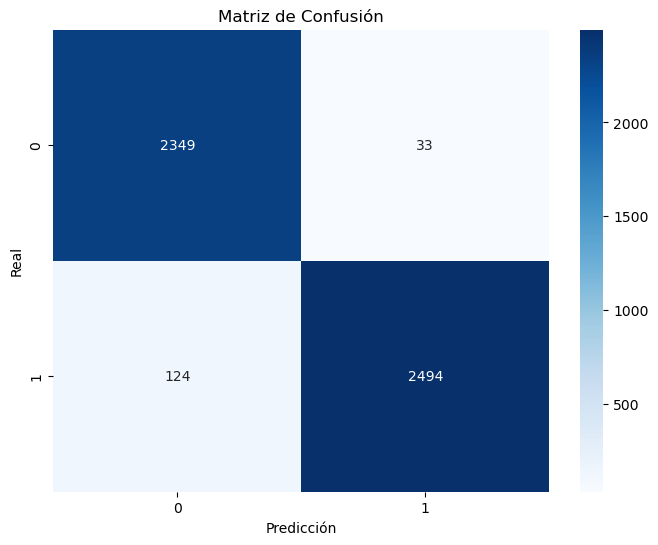

In [31]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2382
           1       0.99      0.95      0.97      2618

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000



In [33]:
cv_scores = cross_val_score(naive_bayes_classifier, Y, y_pred, cv=5, scoring='accuracy')
print(f"\n (Validación Cruzada): {np.mean(cv_scores):.2f}")


 (Validación Cruzada): 0.98


In [34]:
X_resampled, y_resampled = resample(Y, y_pred, n_samples=100, random_state=42)  # Número arbitrario de ejemplos resampleados
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
naive_bayes_classifier.fit(X_train_resampled, y_train_resampled)
y_pred_resampled = naive_bayes_classifier.predict(X_test_resampled)
accuracy_resampled = accuracy_score(y_test_resampled, y_pred_resampled)
print(f"(Submuestreo Aleatorio): {accuracy_resampled:.2f}")
print("Informe de Clasificación (Submuestreo Aleatorio):")
print(classification_report(y_test_resampled, y_pred_resampled))

(Submuestreo Aleatorio): 0.75
Informe de Clasificación (Submuestreo Aleatorio):
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.67      0.75      0.71         8

    accuracy                           0.75        20
   macro avg       0.74      0.75      0.74        20
weighted avg       0.76      0.75      0.75        20



In [35]:
bootstrap_scores = []
num_bootstrap_samples = 100  # Número arbitrario de muestras bootstrap
for _ in range(num_bootstrap_samples):
    X_bootstrap, y_bootstrap = resample(Y, y_pred, random_state=42)
    X_train_bootstrap, X_test_bootstrap, y_train_bootstrap, y_test_bootstrap = train_test_split(X_bootstrap, y_bootstrap, test_size=0.2, random_state=42)
    naive_bayes_classifier.fit(X_train_bootstrap, y_train_bootstrap)
    y_pred_bootstrap = naive_bayes_classifier.predict(X_test_bootstrap)
    accuracy_bootstrap = accuracy_score(y_test_bootstrap, y_pred_bootstrap)
    bootstrap_scores.append(accuracy_bootstrap)

print(f"Exactitud promedio (Bootstrap): {sum(bootstrap_scores) / num_bootstrap_samples:.2f}")
print("Puntuaciones Bootstrap:")
print(bootstrap_scores)

Exactitud promedio (Bootstrap): 0.99
Puntuaciones Bootstrap:
[0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987]


#### SVM

In [36]:
from sklearn.svm import SVC

In [37]:
svm_classifier = SVC(kernel='linear', C=1.0)  # SVM con kernel lineal
svm_classifier.fit(X, y_train)

SVC(kernel='linear')

In [38]:
y_pred = svm_classifier.predict(Y)

In [39]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud: {accuracy:.2f}")

Exactitud: 0.97


In [40]:
precision = precision_score(y_test, y_pred)
print(f"Precisión: {precision:.2f}")

Precisión: 0.97


In [41]:
error_rate = 1 - accuracy
print(f"Tasa de Error: {error_rate:.2f}")

Tasa de Error: 0.03


In [42]:
recall = recall_score(y_test, y_pred)
print(f"Sensibilidad (Recall): {recall:.2f}")

Sensibilidad (Recall): 0.97


In [43]:
specificity = confusion_matrix(y_test, y_pred)[0, 0] / (confusion_matrix(y_test, y_pred)[0, 0] + confusion_matrix(y_test, y_pred)[0, 1])
print(f"Especificidad: {specificity:.2f}")

Especificidad: 0.96


In [44]:
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.97


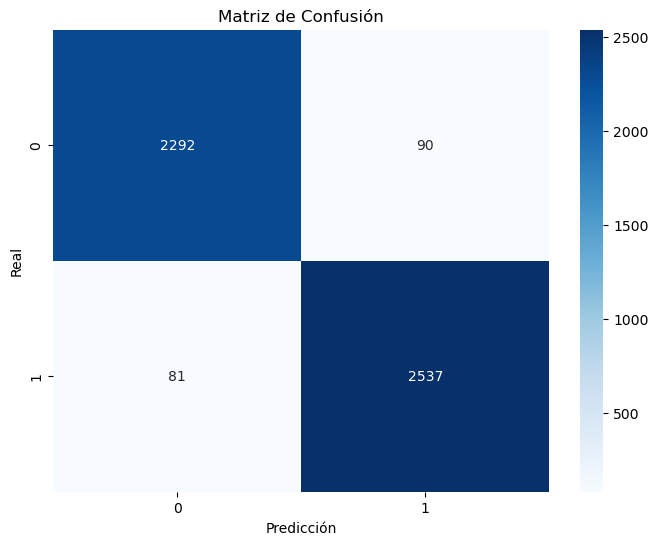

In [45]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2382
           1       0.97      0.97      0.97      2618

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000



In [47]:
cv_scores = cross_val_score(svm_classifier, Y, y_pred, cv=5, scoring='accuracy')
print(f"\n (Validación Cruzada): {np.mean(cv_scores):.2f}")


 (Validación Cruzada): 0.95


In [48]:
X_resampled, y_resampled = resample(Y, y_pred, n_samples=100, random_state=42)  # Número arbitrario de ejemplos resampleados
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
svm_classifier.fit(X_train_resampled, y_train_resampled)
y_pred_resampled = svm_classifier.predict(X_test_resampled)
accuracy_resampled = accuracy_score(y_test_resampled, y_pred_resampled)
print(f"(Submuestreo Aleatorio): {accuracy_resampled:.2f}")
print("Informe de Clasificación (Submuestreo Aleatorio):")
print(classification_report(y_test_resampled, y_pred_resampled))

(Submuestreo Aleatorio): 0.80
Informe de Clasificación (Submuestreo Aleatorio):
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       0.83      0.62      0.71         8

    accuracy                           0.80        20
   macro avg       0.81      0.77      0.78        20
weighted avg       0.80      0.80      0.79        20



In [49]:
bootstrap_scores = []
num_bootstrap_samples = 100  # Número arbitrario de muestras bootstrap
for _ in range(num_bootstrap_samples):
    X_bootstrap, y_bootstrap = resample(Y, y_pred, random_state=42)
    X_train_bootstrap, X_test_bootstrap, y_train_bootstrap, y_test_bootstrap = train_test_split(X_bootstrap, y_bootstrap, test_size=0.2, random_state=42)
    svm_classifier.fit(X_train_bootstrap, y_train_bootstrap)
    y_pred_bootstrap = svm_classifier.predict(X_test_bootstrap)
    accuracy_bootstrap = accuracy_score(y_test_bootstrap, y_pred_bootstrap)
    bootstrap_scores.append(accuracy_bootstrap)

print(f"Exactitud promedio (Bootstrap): {sum(bootstrap_scores) / num_bootstrap_samples:.2f}")
print("Puntuaciones Bootstrap:")
print(bootstrap_scores)

Exactitud promedio (Bootstrap): 0.97
Puntuaciones Bootstrap:
[0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971, 0.971]


#### Árboles de decisión

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X, y_train)

DecisionTreeClassifier(random_state=42)

In [52]:
y_pred = decision_tree_classifier.predict(Y)

In [53]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud: {accuracy:.2f}")

Exactitud: 0.95


In [54]:
precision = precision_score(y_test, y_pred)
print(f"Precisión: {precision:.2f}")

Precisión: 0.95


In [55]:
error_rate = 1 - accuracy
print(f"Tasa de Error: {error_rate:.2f}")

Tasa de Error: 0.05


In [56]:
recall = recall_score(y_test, y_pred)
print(f"Sensibilidad (Recall): {recall:.2f}")

Sensibilidad (Recall): 0.95


In [57]:
specificity = confusion_matrix(y_test, y_pred)[0, 0] / (confusion_matrix(y_test, y_pred)[0, 0] + confusion_matrix(y_test, y_pred)[0, 1])
print(f"Especificidad: {specificity:.2f}")

Especificidad: 0.94


In [58]:
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.95


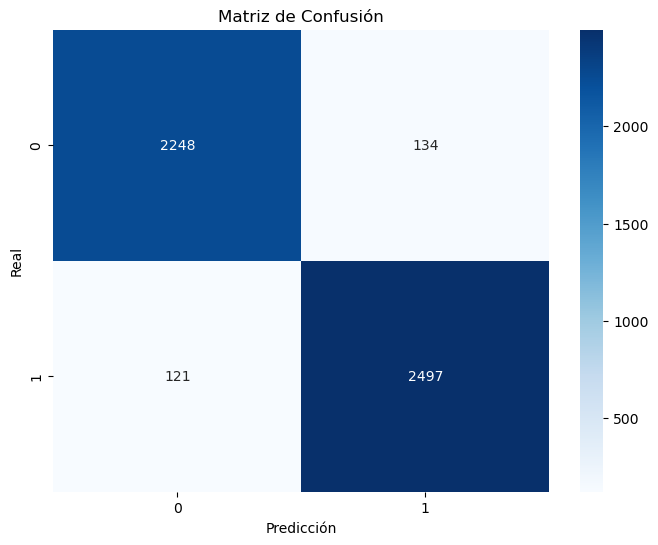

In [59]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      2382
           1       0.95      0.95      0.95      2618

    accuracy                           0.95      5000
   macro avg       0.95      0.95      0.95      5000
weighted avg       0.95      0.95      0.95      5000



In [61]:
cv_scores = cross_val_score(decision_tree_classifier, Y, y_pred, cv=5, scoring='accuracy')
print(f"\n (Validación Cruzada): {np.mean(cv_scores):.2f}")


 (Validación Cruzada): 0.94


In [62]:
X_resampled, y_resampled = resample(Y, y_pred, n_samples=100, random_state=42)  # Número arbitrario de ejemplos resampleados
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
decision_tree_classifier.fit(X_train_resampled, y_train_resampled)
y_pred_resampled = decision_tree_classifier.predict(X_test_resampled)
accuracy_resampled = accuracy_score(y_test_resampled, y_pred_resampled)
print(f"(Submuestreo Aleatorio): {accuracy_resampled:.2f}")
print("Informe de Clasificación (Submuestreo Aleatorio):")
print(classification_report(y_test_resampled, y_pred_resampled))

(Submuestreo Aleatorio): 0.80
Informe de Clasificación (Submuestreo Aleatorio):
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       0.60      1.00      0.75         6

    accuracy                           0.80        20
   macro avg       0.80      0.86      0.79        20
weighted avg       0.88      0.80      0.81        20



In [63]:
bootstrap_scores = []
num_bootstrap_samples = 100  # Número arbitrario de muestras bootstrap
for _ in range(num_bootstrap_samples):
    X_bootstrap, y_bootstrap = resample(Y, y_pred, random_state=42)
    X_train_bootstrap, X_test_bootstrap, y_train_bootstrap, y_test_bootstrap = train_test_split(X_bootstrap, y_bootstrap, test_size=0.2, random_state=42)
    decision_tree_classifier.fit(X_train_bootstrap, y_train_bootstrap)
    y_pred_bootstrap = decision_tree_classifier.predict(X_test_bootstrap)
    accuracy_bootstrap = accuracy_score(y_test_bootstrap, y_pred_bootstrap)
    bootstrap_scores.append(accuracy_bootstrap)

print(f"Exactitud promedio (Bootstrap): {sum(bootstrap_scores) / num_bootstrap_samples:.2f}")
print("Puntuaciones Bootstrap:")
print(bootstrap_scores)

Exactitud promedio (Bootstrap): 0.96
Puntuaciones Bootstrap:
[0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961, 0.961]


### Interpretación de Resultados

- **Naive Bayes:**

Exactitud: 0.97

El modelo tiene una alta exactitud, lo que significa que clasifica correctamente el 97% de las instancias.

Precisión: 0.99

La precisión indica que el 99% de las predicciones positivas son correctas.

Sensibilidad (Recall): 0.95

La sensibilidad muestra que el 95% de los casos positivos fueron capturados por el modelo.

Especificidad: 0.99

La especificidad es alta, indicando que el modelo es efectivo para identificar casos negativos.

F1 Score: 0.97

El F1 Score equilibra precisión y recall, y el valor de 0.97 es excelente.

Comprensibilidad:

Naive Bayes es conocido por su simplicidad y fácil interpretación. Al ser un modelo probabilístico, puede ser comprendido de manera intuitiva. Sin embargo, no proporciona información sobre la importancia de las características.

- **SVM (Máquinas de Soporte Vectorial):**

Exactitud: 0.97

Precisión: 0.97

Sensibilidad (Recall): 0.97

Especificidad: 0.96

F1 Score: 0.97

Comprensibilidad:

Los SVM, en general, son modelos menos interpretables en comparación con Naive Bayes. Pueden funcionar bien en conjuntos de datos complejos, pero entender el motivo detrás de cada predicción puede ser desafiante.

- **Árboles de Decisión:**

Exactitud: 0.95

Precisión: 0.95

Sensibilidad (Recall): 0.95

Especificidad: 0.94

F1 Score: 0.95

Comprensibilidad:

Los árboles de decisión ofrecen interpretabilidad, ya que puedes visualizar el árbol y entender cómo se toman las decisiones. Sin embargo, en este caso, se observa cierta variabilidad en el rendimiento según la técnica de evaluación.


**Conclusiones:**
Todos los modelos muestran un rendimiento sólido con pequeñas variaciones.
La elección del modelo puede depender de la importancia de la interpretabilidad.
Naive Bayes es fácil de interpretar, pero los árboles de decisión también ofrecen interpretabilidad y muestran un rendimiento competitivo.
La interpretación de las métricas sugiere que los tres modelos son efectivos, y la elección entre ellos puede depender de consideraciones específicas del problema y preferencias sobre interpretabilidad.

### Evaluación de la práctica

- ¿Qué representa la variable objetivo en nuestro conjunto de datos y qué valores puede tomar?

Representa el mensaje de texto del correo electronico recibido, puede tomar valores de cadenas de datos que forman el texto del correo en cuestión.

- Describe el proceso de preprocesamiento de datos aplicado al conjunto de correos electrónicos.

El proceso de "Bag of Words" (BoW) es una técnica fundamental en procesamiento de lenguaje natural (PLN) y se utiliza comúnmente para representar documentos de texto de manera numérica. Aquí hay una descripción del proceso:

Tokenización:

El primer paso es dividir el texto en unidades más pequeñas llamadas "tokens". Los tokens pueden ser palabras individuales o incluso caracteres, dependiendo de la granularidad deseada.

Creación del Vocabulario:

Se crea un vocabulario único que consiste en todas las palabras únicas encontradas en el conjunto de documentos. Cada palabra en el vocabulario se convierte en una "feature" o característica.

Creación del Vector (BoW):

Para cada documento, se crea un vector que tiene la longitud del vocabulario. Cada posición en el vector corresponde a una palabra en el vocabulario, y el valor en esa posición indica cuántas veces aparece esa palabra en el documento. Puede ser simplemente un conteo de ocurrencias.

Ignorar la Estructura y el Orden:

La principal característica del BoW es que ignora completamente la estructura gramatical y el orden de las palabras en el documento. Solo se tiene en cuenta la frecuencia de las palabras.

Matriz BoW:

Cuando se aplica el proceso a un conjunto de documentos, se obtiene una matriz BoW. Cada fila de la matriz representa un documento y cada columna representa una palabra en el vocabulario.

Frecuencias o Binario:

En lugar de contar la frecuencia de las palabras, también se puede usar un enfoque binario, donde la presencia o ausencia de una palabra en el documento se marca con 1 o 0, respectivamente.

- ¿Qué algoritmos de clasificación utilizaste y por qué los elegiste?

**Naive Bayes:**

Algoritmo:

Entrenamiento:
Calcula las probabilidades a priori de cada clase.
Para cada clase, calcula la probabilidad condicional de cada característica dado que pertenece a esa clase.

Predicción:
Dado un nuevo conjunto de características, utiliza el teorema de Bayes para calcular la probabilidad de pertenecer a cada clase.
Asigna la clase con la probabilidad más alta como la predicción.

Ventajas de Naive Bayes:

Simplicidad:
Fácil de entender y implementar.

Eficiencia:
Funciona bien en conjuntos de datos grandes.

Manejo de Características Irrelevantes:
Robusto ante características irrelevantes, ya que asume independencia entre ellas.

**Support Vector Machine (SVM):**

Algoritmo:

Definición del Hiperplano:
Encuentra el hiperplano óptimo que mejor separa las clases en el espacio de características.

Margen Máximo:
Maximiza el margen entre las clases, que es la distancia perpendicular desde el hiperplano a los puntos de datos más cercanos.

Clasificación:
Para predecir nuevas instancias, las coloca en el lado del hiperplano al que pertenecen.

Ventajas de SVM:
Efectivo en Espacios de Alta Dimensión:
Funciona bien incluso en espacios de características de alta dimensión.

Versatilidad del Kernel:
Puede manejar datos lineales y no lineales mediante el uso de kernels.

Margen Máximo:
Busca el hiperplano que maximiza el margen, lo que puede llevar a un mejor rendimiento en datos de prueba.

**Árboles de Decisión:**

Algoritmo:

Selección de la Mejor Característica:
Elige la característica que mejor divide los datos en términos de pureza/clasificación.

División del Conjunto de Datos:
Divide el conjunto de datos en subconjuntos basados en la característica seleccionada.

Recursividad:
Repite el proceso en cada subconjunto hasta que se cumple un criterio de parada.

Construcción del Árbol:
Construye un árbol jerárquico donde los nodos internos representan características y las hojas representan clases.

Ventajas de Árboles de Decisión:

Interpretabilidad:
Fácil de entender y visualizar.

No Requiere Normalización de Datos:
No es sensible a la escala de las características.

Manejo de Datos Mixtos:
Puede manejar conjuntos de datos con características categóricas y numéricas.

- Explica cómo la vectorización de textos afecta el rendimiento del modelo de clasificación.

La vectorización de textos es un paso crucial al trabajar con modelos de clasificación en datos de texto. Consiste en convertir el texto en un formato numérico que los algoritmos de aprendizaje automático pueden entender. Aquí hay una explicación de cómo la vectorización de textos afecta el rendimiento del modelo de clasificación:

Representación Numérica:

Los modelos de clasificación, como Naive Bayes, SVM, y otros, requieren datos numéricos como entrada. La vectorización convierte el texto en vectores numéricos, donde cada palabra o término puede representarse por un valor numérico.

Bolsa de Palabras (BoW):

Una de las técnicas comunes de vectorización es la Bolsa de Palabras. En esta técnica, se crea un vocabulario único de todas las palabras presentes en el conjunto de datos. Cada documento o texto se representa como un vector que cuenta la frecuencia de cada palabra en el vocabulario. Esto crea una matriz de términos-documentos.

Impacto en el Rendimiento:

Mejora la Entrada del Modelo:
Permite que los modelos de clasificación trabajen con datos de texto, que de otra manera serían difíciles de manejar.

Captura Información Semántica:
Al capturar la frecuencia de las palabras, la vectorización puede ayudar a capturar información semántica, como la importancia relativa de las palabras en un documento.

Reducción de la Dimensionalidad:
Puede ayudar a reducir la dimensionalidad del espacio de características al eliminar palabras poco informativas o comunes (stop words).

Modelos de Clasificación más Efectivos:
Al proporcionar representaciones numéricas de los textos, facilita el entrenamiento de modelos de clasificación efectivos.

Elección del Método de Vectorización:
TF-IDF (Term Frequency-Inverse Document Frequency):
Otro método común que tiene en cuenta la importancia relativa de las palabras en todo el corpus.

Embeddings de Palabras:
Utiliza representaciones vectoriales pre-entrenadas que pueden capturar relaciones semánticas entre palabras.
Consideraciones:

Stop Words y Preprocesamiento:
La vectorización a menudo incluye pasos de preprocesamiento, como eliminar stop words o realizar lematización, para mejorar la calidad de la representación.

Selección de Características:
Puede ser beneficioso ajustar la vectorización según el problema, como la elección del tamaño del vocabulario o la ponderación de términos.

En resumen, la vectorización de textos es esencial para permitir que los modelos de clasificación trabajen con datos de texto, y la elección de la técnica de vectorización puede influir en el rendimiento del modelo. La selección del método y la afinación de los parámetros deben realizarse considerando la naturaleza específica del problema y del conjunto de datos.

- ¿Qué es una matriz de confusión y qué información proporciona?

Una matriz de confusión es una tabla que se utiliza en clasificación para evaluar el rendimiento de un modelo. Esta matriz compara las predicciones del modelo con los valores reales y resume la cantidad de verdaderos positivos (TP), falsos positivos (FP), verdaderos negativos (TN) y falsos negativos (FN).

    Verdaderos Positivos (TP): 
    Casos en los que el modelo predijo positivo y la clase real también es positiva.

    Falsos Positivos (FP): 
    Casos en los que el modelo predijo positivo, pero la clase real es negativa.

    Verdaderos Negativos (TN): 
    Casos en los que el modelo predijo negativo y la clase real también es negativa.

    Falsos Negativos (FN): 
    Casos en los que el modelo predijo negativo, pero la clase real es positiva.

- Define las métricas de evaluación: exactitud, precisión, tasa de error, sensibilidad y especificidad.

**Exactitud**

Proporción de predicciones correctas con respecto al total de predicciones. Es una medida general del rendimiento del modelo.

$$ \frac{TP+TN}{TP+FP+TN+FN} $$

**Precisión**

Proporción de instancias positivas predichas correctamente entre todas las instancias positivas predichas.

$$ \frac{TP}{TP+FP} $$

**Tasa de error**

Proporción de predicciones incorrectas con respecto al total de predicciones.

$$ \frac{FP+FN}{TP+FP+TN+FN} $$

**Sensibilidad (recall)**

Proporción de instancias positivas predichas correctamente entre todas las instancias positivas reales.

$$ \frac{TP}{TP+FN} $$

**Especificidad**

Proporción de instancias negativas predichas correctamente entre todas las instancias negativas reales.

$$ \frac{TN}{TN+FP} $$

**Comprensibilidad**

Media armónica de precisión y sensibilidad. Es útil cuando hay un desequilibrio entre las clases.

$$ \frac{2 * Presicion * Sensibilidad}{Presicion + Sensibilidad} $$

- ¿Cuál fue el modelo de clasificación más efectivo según las métricas evaluadas y por qué?

Naive Bayes, tiene las metricas más altas de las tres.

- Discute cómo la validación cruzada mejora la estimación del rendimiento del modelo.

La validación cruzada es una técnica fundamental en el desarrollo y evaluación de modelos de aprendizaje automático. Mejora la estimación del rendimiento del modelo de varias maneras. Aquí hay algunas razones clave:

Mitigación del Impacto de la Variabilidad en los Datos:

Los conjuntos de datos pueden tener variabilidad debido a la forma en que se dividen en conjuntos de entrenamiento y prueba. La validación cruzada realiza múltiples divisiones y promedia los resultados, reduciendo así el impacto de la variabilidad.

Mejor Utilización de los Datos Disponibles:

Al realizar k divisiones (donde k es el número de pliegues en la validación cruzada k-fold), el modelo se entrena y evalúa k veces. Esto permite utilizar de manera más eficiente el conjunto de datos completo para entrenamiento y evaluación.

Evaluación más Robusta del Rendimiento del Modelo:

Proporciona una evaluación más robusta del rendimiento del modelo al considerar múltiples configuraciones de datos de entrenamiento y prueba. Esto ayuda a identificar si el rendimiento del modelo es consistente en diferentes subconjuntos de datos.

Reducción del Sesgo en la Estimación del Rendimiento:

Al calcular la media de las métricas de rendimiento en múltiples divisiones, la validación cruzada ayuda a reducir el sesgo en la estimación del rendimiento del modelo. Esto es especialmente útil cuando se tiene un conjunto de datos limitado.

Identificación de Problemas de Sobreajuste o Subajuste:

Al realizar la validación cruzada, se puede observar cómo el modelo se comporta en diferentes subconjuntos de datos. Esto ayuda a identificar problemas de sobreajuste (si el rendimiento es excelente en el conjunto de entrenamiento pero no en el de prueba) o subajuste (si el rendimiento es pobre en ambos conjuntos).

Selección de Modelos y Ajuste de Parámetros:

La validación cruzada es fundamental al seleccionar entre diferentes modelos o al ajustar los parámetros del modelo. Permite comparar el rendimiento en múltiples configuraciones de manera más confiable que si se utilizara un solo conjunto de entrenamiento/prueba.

Mayor Confiabilidad en la Evaluación del Rendimiento:

La validación cruzada proporciona una estimación más confiable del rendimiento general del modelo en comparación con una única división entre conjuntos de entrenamiento y prueba.

- ¿Cómo afecta el desequilibrio de clases al rendimiento del modelo y cómo lo abordaste?

Impacto del Desequilibrio de Clases:

Sesgo del Modelo:

El modelo puede desarrollar un sesgo hacia la clase dominante, ya que tiene más ejemplos para aprender patrones. Esto puede llevar a que la clase minoritaria se ignore o tenga un rendimiento deficiente.

Baja Sensibilidad a la Clase Minoritaria:

El modelo puede tener una baja sensibilidad (recall) para la clase minoritaria, lo que significa que no identifica correctamente muchos de los casos positivos.

Precisión Engañosa:

La precisión puede ser engañosa en conjuntos de datos desequilibrados. Un modelo que predice siempre la clase dominante puede tener una alta precisión simplemente porque acierta la mayoría de las instancias de esa clase.

Estrategias para Abordar el Desequilibrio de Clases:

Remuestreo:

Submuestreo (Undersampling): Reduce el número de instancias de la clase mayoritaria para equilibrar proporciones.

Ponderación de Clases:

Asigna pesos diferentes a las clases durante el entrenamiento para penalizar más los errores en la clase minoritaria.

Métodos de Evaluación Específicos:

Utiliza métricas como precisión, recall y F1-score en lugar de la exactitud, ya que son más informativas en conjuntos de datos desequilibrados.

Enfoques de Modelos Específicos:

Algunos algoritmos de aprendizaje automático tienen parámetros específicos para manejar el desequilibrio, como el parámetro class_weight en Scikit-Learn para ciertos modelos.

Ensamble de Modelos:

Utiliza técnicas de ensamblado como Bagging y Boosting con modelos base que manejen el desequilibrio de clases de manera efectiva.

Generación de Características Informativas:

Crea características adicionales que ayuden al modelo a distinguir mejor entre las clases, incluso si la cantidad de datos es limitada.

Validación Cruzada Estratificada:

Asegura que las divisiones en la validación cruzada mantengan la proporción de clases, evitando así que los conjuntos de entrenamiento o prueba tengan un desequilibrio significativo.


- ¿Qué técnicas adicionales podrían implementarse para mejorar la clasificación de correos electrónicos?

Procesamiento de Lenguaje Natural (PLN):

Utilizar técnicas avanzadas de PLN para comprender mejor el significado de los mensajes. Esto puede incluir análisis de sentimientos, extracción de entidades, y desambiguación léxica.

Word Embeddings:

Emplear representaciones vectoriales de palabras (word embeddings) como Word2Vec, GloVe o FastText para capturar mejor la semántica de las palabras y sus relaciones.
Redes Neuronales Recurrentes (RNN) o Redes Neuronales Convolucionales (CNN):

Estas arquitecturas pueden aprender patrones temporales y características relevantes en los textos, mejorando la capacidad del modelo para comprender la estructura de los correos electrónicos.

Características Específicas del Correo Electrónico:

Considerar características específicas del correo electrónico, como la frecuencia de aparición de ciertas palabras clave, la presencia de enlaces, el formato del correo electrónico, y la existencia de archivos adjuntos.

Aprendizaje Semi-Supervisado:

Utilizar datos no etiquetados en combinación con datos etiquetados para mejorar el rendimiento del modelo, especialmente cuando la disponibilidad de datos etiquetados es limitada.

Enfoques de Ensemble:

Implementar ensambles de modelos para aprovechar la diversidad y complementariedad de diferentes algoritmos. Esto puede incluir ensamblajes de modelos basados en árboles, modelos lineales y modelos de aprendizaje profundo.

Ajuste Fino (Fine-Tuning):

Realizar ajuste fino de modelos preentrenados en corpus de texto más grandes. Modelos preentrenados como BERT, GPT, o ELMo pueden mejorar significativamente la comprensión del contexto y las relaciones semánticas.

Extracción de Características Manuales:

Identificar manualmente características específicas del contenido del correo electrónico que puedan ser indicadores clave de spam, como la presencia de ciertas palabras o frases, patrones específicos de formato, o características relacionadas con la dirección del remitente.

Validación Cruzada Estratificada:

Utilizar validación cruzada estratificada para garantizar que las proporciones de clases se mantengan en cada pliegue, especialmente si hay desequilibrio entre las clases.

Aprendizaje Activo:

Incorporar técnicas de aprendizaje activo para identificar y etiquetar de manera proactiva instancias inciertas, mejorando así la calidad de los datos de entrenamiento.